<a href="https://colab.research.google.com/github/Faraz011/Assignment-AIML-Lab/blob/main/Dynamic_Pricing_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split



reading data form source file

In [14]:
data = pd.read_csv('data.csv')
print(data.head())

         date  year  month  day_of_week  day_of_month  week_of_year  quarter  \
0  2020-01-01  2020      1            3             1             1        1   
1  2020-01-01  2020      1            3             1             1        1   
2  2020-01-01  2020      1            3             1             1        1   
3  2020-01-02  2020      1            4             2             1        1   
4  2020-01-02  2020      1            4             2             1        1   

    day_name month_name  season  ...  price_difference price_advantage  \
0  Wednesday    January  Winter  ...             -0.04               1   
1  Wednesday    January  Winter  ...              0.52               0   
2  Wednesday    January  Winter  ...              1.27               0   
3   Thursday    January  Winter  ...             -0.71               1   
4   Thursday    January  Winter  ...             -0.75               1   

   price_ratio_vs_competitor starting_inventory  ending_inventory  restock

Data preprocessing and Feature Engineering

In [15]:
numeric_feat = data.select_dtypes(include = ['int64','float64']).columns


In [16]:
skewness = data[numeric_feat].skew()
print(skewness.sort_values(ascending = False))

demand_shock                 9.331092
is_holiday                   3.454220
stockout                     2.553046
demand                       2.196976
restocked                    2.127229
is_promotion                 2.023521
revenue                      1.536622
is_weekend                   0.951068
ending_inventory             0.863663
starting_inventory           0.810312
competitor_price             0.398402
own_price                    0.309400
price_ratio_vs_competitor    0.162447
year                         0.086362
price_advantage              0.056041
quarter                      0.031676
week_of_year                 0.026061
month                        0.017617
day_of_month                 0.014588
day_of_week                  0.000917
price_difference            -0.502031
dtype: float64


In [17]:
skewed_feat = skewness[abs(skewness) > 0.1].index
print(skewed_feat)

Index(['is_weekend', 'is_holiday', 'is_promotion', 'own_price',
       'competitor_price', 'price_difference', 'price_ratio_vs_competitor',
       'starting_inventory', 'ending_inventory', 'restocked', 'stockout',
       'demand', 'demand_shock', 'revenue'],
      dtype='object')


In [18]:
data['revenue'] = np.log1p(data['revenue'])
data['price_difference'] = np.log1p(data['price_difference'])

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [19]:
print (data['price_difference'].head())
print (data['revenue'].head())

0   -0.040822
1    0.418710
2    0.819780
3   -1.237874
4   -1.386294
Name: price_difference, dtype: float64
0    7.021111
1    7.380081
2    6.257342
3    6.911847
4    6.945764
Name: revenue, dtype: float64


In [20]:
data['price_x_promotion'] = data['own_price'] * data['is_promotion']
data['price_x_weekend'] = data['own_price'] * data['is_weekend']


print(data.head())

         date  year  month  day_of_week  day_of_month  week_of_year  quarter  \
0  2020-01-01  2020      1            3             1             1        1   
1  2020-01-01  2020      1            3             1             1        1   
2  2020-01-01  2020      1            3             1             1        1   
3  2020-01-02  2020      1            4             2             1        1   
4  2020-01-02  2020      1            4             2             1        1   

    day_name month_name  season  ...  price_ratio_vs_competitor  \
0  Wednesday    January  Winter  ...                   0.998822   
1  Wednesday    January  Winter  ...                   1.013815   
2  Wednesday    January  Winter  ...                   1.070477   
3   Thursday    January  Winter  ...                   0.975826   
4   Thursday    January  Winter  ...                   0.984349   

  starting_inventory  ending_inventory restocked  stockout  demand  \
0                500               467        

In [21]:
split_indx = int(len(data) * 0.8)
train_data = data[:split_indx]
test_data = data[split_indx:]

X_train = train_data[[
    'own_price', 'competitor_price', 'is_promotion', 'price_difference',
    'price_x_promotion', 'is_weekend', 'day_of_week', 'month', 'demand'
]]
y_train = train_data['revenue']
X_test = test_data[[
    'own_price', 'competitor_price', 'is_promotion', 'price_difference',
    'price_x_promotion', 'is_weekend', 'day_of_week', 'month', 'demand'
]]
y_test = test_data['revenue']

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import PoissonRegressor
data = data.replace([np.inf, -np.inf], np.nan).dropna()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = PoissonRegressor(alpha = 0.1,max_iter = 1000)
model.fit(X_train_scaled, y_train)

ValueError: Input X contains infinity or a value too large for dtype('float64').

In [23]:
from sklearn.metrics import accuracy_score
predict = model.predict(X_test_scaled)


NameError: name 'model' is not defined

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predict)
print(f'Mean Squared Error: {mse}')

In [ ]:
mean = data['revenue'].mean()
print(f'Mean Revenue: {mean}')

Implementing XGBoost

In [24]:
from xgboost import XGBRegressor, XGBClassifier

xgb_model = XGBRegressor(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42
)

xgb_model.fit(X_train, y_train)  # No scaling needed

XGBoostError: [23:20:01] /workspace/src/data/gradient_index.h:100: Check failed: valid: Input data contains `inf` or a value too large, while `missing` is not set to `inf`
Stack trace:
  [bt] (0) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x2a6e7c) [0x7b94a22a6e7c]
  [bt] (1) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x5eba2d) [0x7b94a25eba2d]
  [bt] (2) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x5e96cb) [0x7b94a25e96cb]
  [bt] (3) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x5ea8f9) [0x7b94a25ea8f9]
  [bt] (4) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x57b4f1) [0x7b94a257b4f1]
  [bt] (5) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(XGQuantileDMatrixCreateFromCallback+0x178) [0x7b94a21b9378]
  [bt] (6) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x7b94e7213e2e]
  [bt] (7) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x7b94e7210493]
  [bt] (8) /usr/lib/python3.12/lib-dynload/_ctypes.cpython-312-x86_64-linux-gnu.so(+0x98c1) [0x7b94e84378c1]



In [25]:
!pip install xgboost

In [26]:
predict1 = xgb_model.predict(X_test)

NotFittedError: need to call fit or load_model beforehand

In [27]:
mse1 = mean_squared_error(y_test, predict1)
print(f'Mean Squared Error: {mse1}')

NameError: name 'mean_squared_error' is not defined

In [ ]:
rmse = np.sqrt(mse1)
print(f'Root Mean Squared Error: {rmse}')

In [74]:
      split_indx = int(len(data) * 0.5)
      train_data = data[:split_indx]
      test_data = data[split_indx:]

In [75]:

class PriceDemandPredictor:



    def __init__(self):
        self.price_model = None
        self.demand_model = None
        self.scaler_price = StandardScaler()
        self.scaler_demand = StandardScaler()

    def train_models(self, data):
        """Train both models on the same dataset"""

        # Clean data
        data = train_data.replace([np.inf, -np.inf], np.nan).dropna()

        # Numerical Encoding
        data['Product_num'] = pd.factorize(data['product_id'])[0]+1


        # Feature sets
        demand_features = train_data[['own_price','competitor_price','is_promotion','price_difference',
                                'price_x_promotion','is_weekend','day_of_week','month']]
        price_features = train_data[['competitor_price','is_promotion','price_difference','price_x_promotion',
                               'is_weekend','day_of_week','month','demand']]

        demand_target = train_data['demand']
        price_target = train_data['own_price']

        # Scale separately
        X_demand = self.scaler_demand.fit_transform(demand_features)
        X_price = self.scaler_price.fit_transform(price_features)

        # Train models
        self.price_model = PoissonRegressor(alpha=0.1, max_iter=1000)
        self.price_model.fit(X_price, price_target)

        self.demand_model = XGBRegressor(
            n_estimators=100,
            max_depth=6,
            learning_rate=0.05,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42
        )
        self.demand_model.fit(X_demand, demand_target)

        print(" Models trained successfully on data.")
        return self

    def price_demand_prediction(self, data):
        """Predict new price and new demand on same dataset"""

        # Make a copy to avoid modifying original data
        data_copy = train_data.copy()
        data_copy = data_copy.replace([np.inf, -np.inf], np.nan).fillna(0)

        # --- Step 1: Predict new price ---
        price_features = data_copy[['competitor_price','is_promotion','price_difference','price_x_promotion',
                               'is_weekend','day_of_week','month','demand']]
        X_price = self.scaler_price.transform(price_features)
        new_price = self.price_model.predict(X_price)

        # temporarily add it
        data_copy['temp_price'] = new_price

        # --- Step 2: Predict new demand using new price ---
        # use temp_price as 'own_price' to match training feature names
        demand_features = data_copy[['temp_price','competitor_price','is_promotion','price_difference',
                                'price_x_promotion','is_weekend','day_of_week','month']].copy()
        demand_features = demand_features.rename(columns={'temp_price': 'own_price'})

        X_demand = self.scaler_demand.transform(demand_features)
        new_demand = self.demand_model.predict(X_demand)

        # --- Step 3: Create results DataFrame ---
        results = pd.DataFrame({
            'product_id': data['product_id'],
            'original_price': data['own_price'],
            'new_price': new_price,
            'original_demand': data['demand'],
            'new_demand': new_demand,
            'is_promotion': data['is_promotion'],

            'date': data['date'] if 'date' in data.columns else range(len(data))
        })

        print(" Predictions completed: ['new_price', 'new_demand']")
        return results


In [76]:
predictor = PriceDemandPredictor()
predictor.train_models(test_data)


results = predictor.price_demand_prediction(test_data)
price_pred = results['new_price']
demand_pred = results['new_demand']


print(f"Price predictions: {len(price_pred)} values")
print(f"Demand predictions: {len(demand_pred)} values")


print(results[['original_price', 'new_price', 'original_demand', 'new_demand']].head())


baseline_revenue = (results['original_price'] * results['original_demand']).sum()


optimized_revenue = (results['new_price'] * results['new_demand']).sum()

print("REVENUE COMPARISON:")
print(f"Baseline Revenue: ${baseline_revenue:,.2f}")
print(f"Optimized Revenue: ${optimized_revenue:,.2f}")


revenue_difference = optimized_revenue - baseline_revenue
uplift_percentage = (revenue_difference / baseline_revenue) * 100

print(f"Revenue Difference: ${revenue_difference:,.2f}")
print(f"Revenue Uplift: {uplift_percentage:.2f}%")



 Models trained successfully on data.
 Predictions completed: ['new_price', 'new_demand']
Price predictions: 104 values
Demand predictions: 104 values
      original_price  new_price  original_demand  new_demand
2173           42.59  32.214343              161   37.978489
2193           33.42  40.196384               49   45.271523
2195           21.20  21.583425               64   34.804523
2325           24.64  32.738062              134   34.944717
2326           45.48  50.419811               33   22.651989
REVENUE COMPARISON:
Baseline Revenue: $227,576.81
Optimized Revenue: $234,888.02
Revenue Difference: $7,311.21
Revenue Uplift: 3.21%


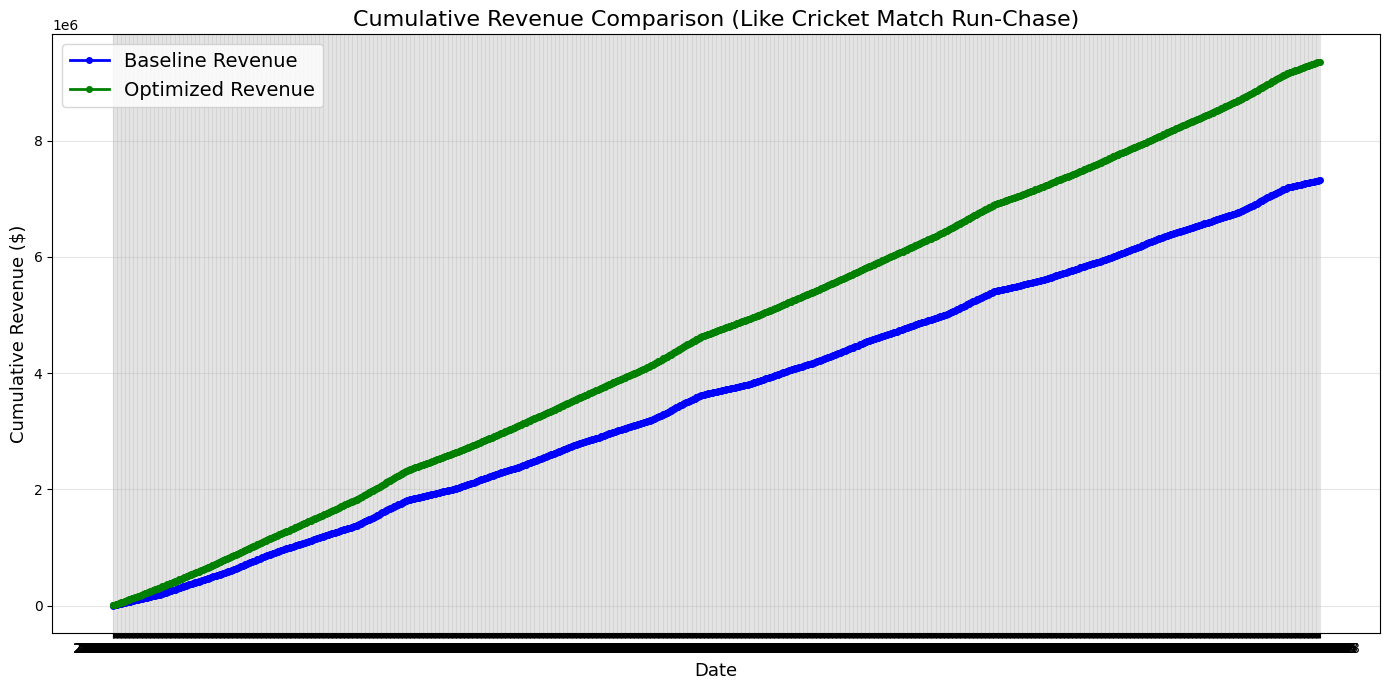

In [58]:
import matplotlib.pyplot as plt

# Make sure columns exist
if 'baseline_revenue' not in results.columns or 'optimized_revenue' not in results.columns:
    results['baseline_revenue'] = results['original_price'] * results['original_demand']
    results['optimized_revenue'] = results['new_price'] * results['new_demand']

# Sort by date
results_sorted = results.sort_values(['date'])

# Sum by date
revenue_by_date = results_sorted.groupby('date')[['baseline_revenue', 'optimized_revenue']].sum().reset_index()

# Cumulative revenue plot
revenue_by_date['cumulative_baseline'] = revenue_by_date['baseline_revenue'].cumsum()
revenue_by_date['cumulative_optimized'] = revenue_by_date['optimized_revenue'].cumsum()

plt.figure(figsize=(14, 7))
plt.plot(revenue_by_date['date'], revenue_by_date['cumulative_baseline'], label='Baseline Revenue', color='blue', linewidth=2, marker='o', markersize=4)
plt.plot(revenue_by_date['date'], revenue_by_date['cumulative_optimized'], label='Optimized Revenue', color='green', linewidth=2, marker='o', markersize=4)

plt.title('Cumulative Revenue Comparison (Like Cricket Match Run-Chase)', fontsize=16)
plt.xlabel('Date', fontsize=13)
plt.ylabel('Cumulative Revenue ($)', fontsize=13)
plt.legend(loc='upper left', fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()

# Optionally, mark each product point with a dot, add hover/marker per product_id
plt.show()


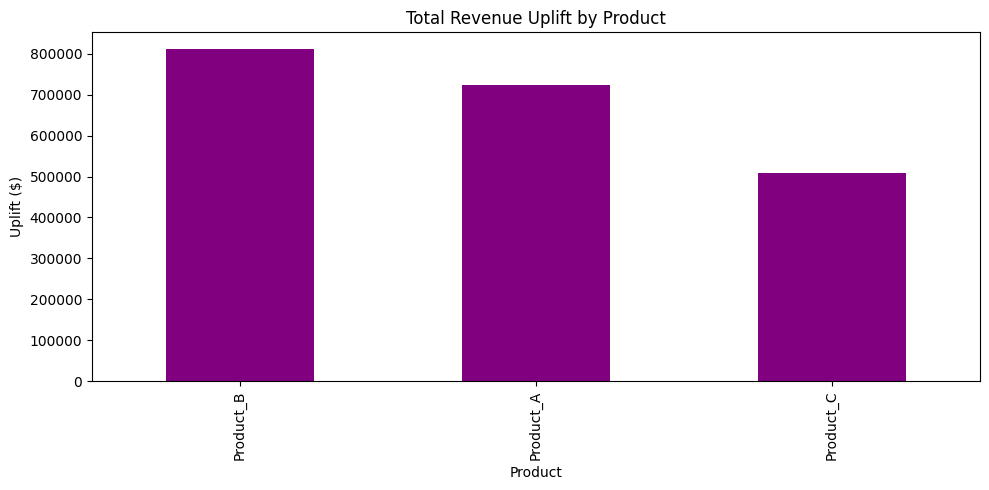

In [59]:
uplift_by_product = results.groupby('product_id')[['baseline_revenue','optimized_revenue']].sum()
uplift_by_product['uplift'] = uplift_by_product['optimized_revenue'] - uplift_by_product['baseline_revenue']

uplift_by_product['uplift_pct'] = (uplift_by_product['uplift'] / uplift_by_product['baseline_revenue'] * 100).round(1)
uplift_by_product = uplift_by_product.sort_values('uplift', ascending=False)

uplift_by_product['uplift'].plot(kind='bar', color='purple', figsize=(10,5))
plt.title('Total Revenue Uplift by Product')
plt.xlabel('Product')
plt.ylabel('Uplift ($)')
plt.tight_layout()
plt.show()


<Figure size 800x500 with 0 Axes>

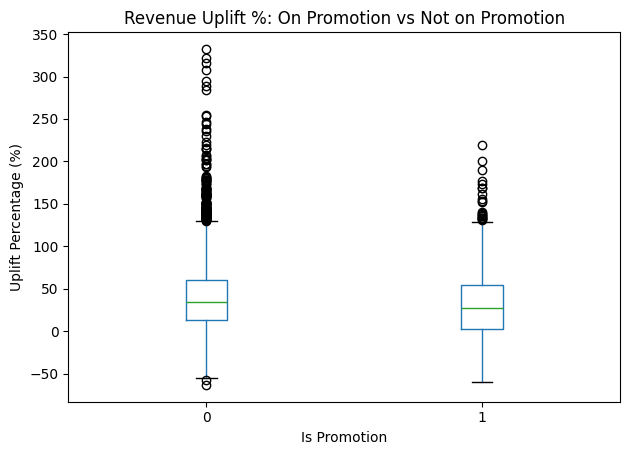

In [62]:
results['uplift_pct'] = (results['optimized_revenue'] - results['baseline_revenue']) / results['baseline_revenue'] * 100

plt.figure(figsize=(8,5))
results.boxplot(column='uplift_pct', by='is_promotion', grid=False)
plt.title('Revenue Uplift %: On Promotion vs Not on Promotion')
plt.suptitle('')
plt.xlabel('Is Promotion')
plt.ylabel('Uplift Percentage (%)')
plt.tight_layout()
plt.show()


<Figure size 800x600 with 0 Axes>

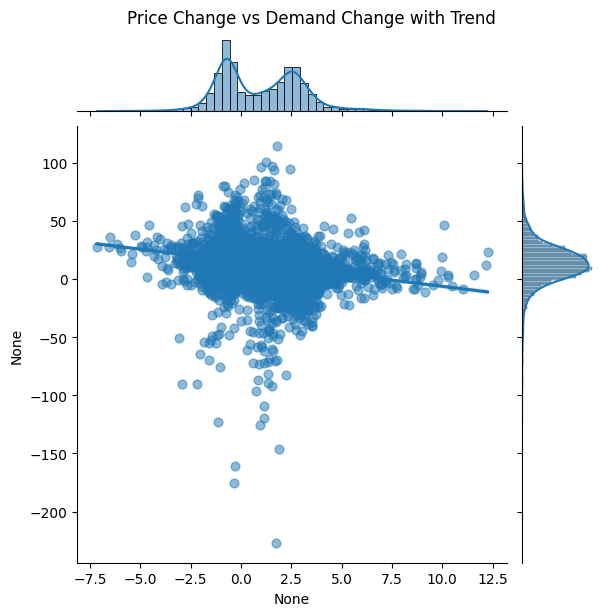

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.jointplot(
    x=results['new_price'] - results['original_price'],
    y=results['new_demand'] - results['original_demand'],
    kind='reg',
    height=6,
    scatter_kws={'alpha': 0.5, 's': 40}
)
plt.suptitle("Price Change vs Demand Change with Trend", y=1.02)
plt.show()


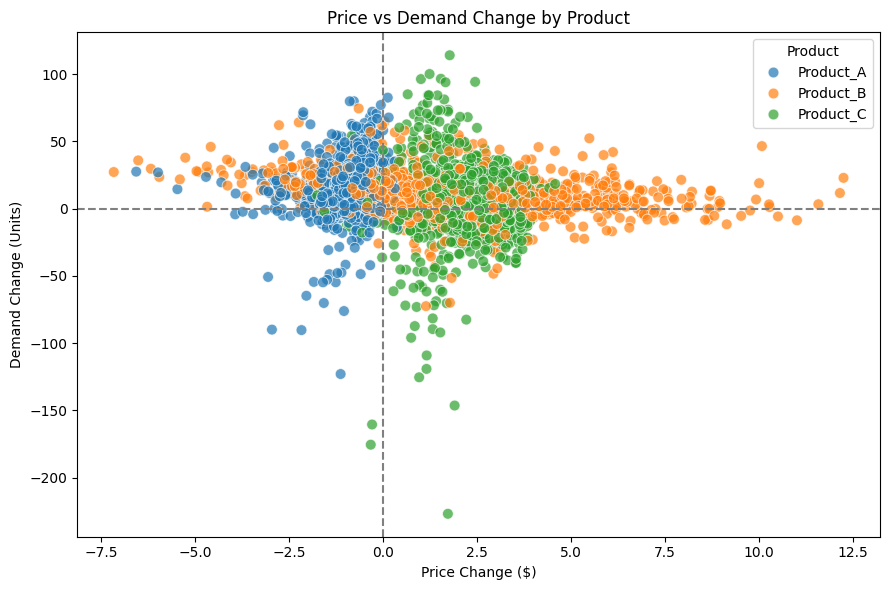

In [66]:
plt.figure(figsize=(9,6))
sns.scatterplot(
    x=results['new_price'] - results['original_price'],
    y=results['new_demand'] - results['original_demand'],
    hue=results['product_id'], alpha=0.7, s=60
)
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.title('Price vs Demand Change by Product')
plt.xlabel('Price Change ($)')
plt.ylabel('Demand Change (Units)')
plt.legend(title='Product')
plt.tight_layout()
plt.show()
